In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

## 샤넬

In [3]:
mag_ch = pd.read_csv('./magazine/final/magazine_ch_stickword.csv', sep ='|', encoding = 'utf-8')

In [4]:
mag_ch['word'] = mag_ch['word_chanel']

In [5]:
mag_CH = mag_ch[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [6]:
len(mag_CH)

1450

In [7]:
for i in range(len(mag_CH)):
    if '예쁜' in mag_CH.loc[i, 'ADFN_2']:
        print(i, mag_CH.loc[i, 'ADFN_2'])
        print('-'* 50)

24 ['간', '얼루어', '그린', '이슈', '얼루어', '그린', '캠페인', '진행', '많은', '부분', '많은', '습관', '몸', '에코', '텀블러', '사용', '일상생활', '신경', '대부분', '편이', '포장재', '잔뜩', '새벽', '배송', '서비스', '배달', '음식', '서비스', '이용', '그럼에도', '포기', '없는', '아이템', '소비', '예쁜', '걸', '없었다', '미니멀리즘', '유혹', '환경윤리', '갈등', '고민', '끝', '결론', '걸', '좋아하는', '문학', '영화', '미식', '여행', '좋아하듯', '옷', '신발', '가방', '좋아한다', '공통점', '좋아하는', '게', '게', '가끔', '슬펐다', '누군가', '천재', '있는데', '이유', '쓸데없는', '취급', '좋은', '개성', '부여', '블라우스', '펌프스', '디테일', '금세', '감동', '지갑', '연', '그랬기에', '제인', '폰다', '선언', '더없이', '아프게', '감동', '구매', '옷', '신발', '가방', '끊임없이', '유행', '변덕', '나이', '여러', '이유', '짐', '더미', '이기', '친한', '에디터', '스타일', '리스트', '에디터', '스', '마켓', '이름', '플리', '마켓', '열기', '기부', '플리', '마켓', '장사', '그럼에도', '리지', '늘', '있고', '짐', '더미', '소비', '있고', '소비', '물건', '생명력', '마련', '거', '이건', '수도', '없고', '쓰레기', '탄소', '발생', '제인', '폰', '다처', '럼', '앞', '옷', '안', '산다', '선언', '물건', '관리', '어떨까', '안', '옷', '새로운', '생명', '부여', '수도', '있지', '그렇다면', '죄책감', '작년', '코펜하겐', '거리', '수많은', '빈티지지숍', '정체', '알', '없는

In [8]:
'예쁘고', '예쁘진', '예쁘냐가', '예쁘게', '예쁘면서도', '예쁜'

('예쁘고', '예쁘진', '예쁘냐가', '예쁘게', '예쁘면서도', '예쁜')

In [9]:
'귀여운', '귀엽고', '귀여워서', '귀여워'

('귀여운', '귀엽고', '귀여워서', '귀여워')

In [10]:
idx9 = []
for i in range(len(mag_CH)):
    if i % 9 == 0 :
        idx9.append(i)

In [11]:
mag_CH9 = mag_CH.loc[idx9]

In [12]:
mag_CH9.reset_index(drop = True, inplace = True)

In [46]:
idx8 = []
for i in range(len(mag_CH)):
    if i % 8 == 0 :
        idx8.append(i)

In [54]:
mag_CH8 = mag_CH.loc[idx8]

In [55]:
mag_CH8.reset_index(drop = True, inplace = True)

In [84]:
idx7 = []
for i in range(len(mag_CH)):
    if i % 7 == 0 :
        idx7.append(i)

In [85]:
mag_CH7 = mag_CH.loc[idx7]

In [86]:
mag_CH7.reset_index(drop = True, inplace = True)

## 리사

### 리사 (유튜브 + 매거진)

In [13]:
tot_l = pd.read_csv('./magazine/final/video_lisa_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [14]:
tot_l['word'] = tot_l['word_lisa']

In [15]:
tot_L = tot_l[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [16]:
len(tot_L)

197

### 샤넬 + 리사

In [17]:
CH9L = pd.concat([mag_CH9, tot_L])

In [18]:
CH9L.reset_index(drop = True, inplace = True)

In [78]:
CH9L.to_csv('./magazine/final/CH9L.csv', sep = '|', encoding = 'utf-8', index = False)

In [20]:
len(CH9L)

359

### 8

In [56]:
CH8L = pd.concat([mag_CH8, tot_L])

In [57]:
CH8L.reset_index(drop = True, inplace = True)

In [79]:
CH8L.to_csv('./magazine/final/CH8L.csv', sep = '|', encoding = 'utf-8', index = False)

In [59]:
len(CH8L)

379

### 7

In [87]:
CH7L = pd.concat([mag_CH7, tot_L])

In [88]:
CH7L.reset_index(drop = True, inplace = True)

In [89]:
CH7L.to_csv('./magazine/final/CH7L.csv', sep = '|', encoding = 'utf-8', index = False)

In [90]:
len(CH7L)

405

## stopword 추가

In [60]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [61]:
sw_df.columns = ['stopword']

In [23]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [24]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [25]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [26]:
add_0 = ['해', '하는', '할', '한', '영상', '했다', '뭐', '넘', '수', '정말', '그냥', '보고', '있는',
         '전소민', '공유', '양세찬', '항상', '다시', '통해', '한편', 'a', '공개', '자체', '형', '와중', '↑', '걸',
         '있습니다', 'to', '아닌데', '있는데', '보기', '하다', '곤', '없어', '대한', '싶다', '명', '민','the',
         '보니', '아는', '전', '진짜', '멤버', '잘', '모습', '발음', '제일', '기자', '데뷔', '아는', '택시', 
         '활동', '썸네일', '나도', '가사', '하네요', '길다', '보이는', '까', '없는데', '몰랐는데', '대해', 
         '보인다', '위해', '로서', '이수근', '보여', '있으면', '보다', '같네', '하자', '최수영', 'that', 
         '하며', '세찬', '않고', '됨', '오는', '사이', '아주', '진행', '채', '이자',
        '진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히']
for w in add_0:
    stop_words.append(w)

In [27]:
add_1 = ['BLACKPINK', '제니', '지수', '로제']
for w in add_1:
    stop_words.append(w)

In [28]:
len(stop_words)

899

In [29]:
CH9L['ADFN_2'] = CH9L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [30]:
noun_adj_list = []
for i in range(len(CH9L)):
    for word in CH9L.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

### 8

In [62]:
CH8L['ADFN_2'] = CH8L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [63]:
noun_adj_list = []
for i in range(len(CH8L)):
    for word in CH8L.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [64]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('리사', 3571), ('예쁘다', 676), ('CHANEL', 630), ('귀엽다', 543), ('춤', 479), ('사랑', 343), ('한국', 289), ('랩', 280), ('영어', 248), ('노래', 230), ('무대', 217), ('브랜드', 215), ('얼굴', 201), ('매력', 198), ('아이돌', 178), ('블랙', 175), ('태국', 171), ('모델', 163), ('중국', 162), ('한국어', 156), ('스타일', 155), ('한국인', 145), ('패션', 139), ('느낌', 138), ('표정', 133), ('비율', 133), ('룩', 129), ('멋있다', 129), ('장식', 128), ('컬러', 127), ('실력', 125), ('KARL', 121), ('외국인', 117), ('눈', 115), ('팬', 113), ('쇼', 110), ('여자', 108), ('최고', 104), ('드레스', 103), ('머리', 101), ('세계', 98), ('백', 95), ('옷', 91), ('인기', 89), ('연습생', 89), ('파리', 87), ('호랑이', 86), ('재킷', 83), ('좋은', 81), ('예능', 80), ('처음', 79), ('그룹', 79), ('CELINE', 77), ('완성', 77), ('프로', 75), ('가장', 74), ('다리', 73), ('아이템', 72), ('봄', 72), ('많은', 70), ('주얼리', 70), ('시작', 70), ('디자이너', 70), ('부츠', 69), ('참석', 69), ('노력', 69), ('프라다', 69), ('앞머리', 69), ('포인트', 68), ('스타', 68), ('인형', 68), ('단발', 67), ('걸그룹', 67), ('태국인', 67), ('컬렉션', 67), ('스커트', 66), ('분위기', 66), ('외국', 66

In [65]:
count = Counter(noun_adj_list)

In [66]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('리사', 3571)
('예쁘다', 676)
('CHANEL', 630)
('귀엽다', 543)
('춤', 479)
('사랑', 343)
('한국', 289)
('랩', 280)
('영어', 248)
('노래', 230)
('무대', 217)
('브랜드', 215)
('얼굴', 201)
('매력', 198)
('아이돌', 178)
('블랙', 175)
('태국', 171)
('모델', 163)
('중국', 162)
('한국어', 156)
('스타일', 155)
('한국인', 145)
('패션', 139)
('느낌', 138)
('표정', 133)
('비율', 133)
('룩', 129)
('멋있다', 129)
('장식', 128)
('컬러', 127)
('실력', 125)
('KARL', 121)
('외국인', 117)
('눈', 115)
('팬', 113)
('쇼', 110)
('여자', 108)
('최고', 104)
('드레스', 103)
('머리', 101)
('세계', 98)
('백', 95)
('옷', 91)
('인기', 89)
('연습생', 89)
('파리', 87)
('호랑이', 86)
('재킷', 83)
('좋은', 81)
('예능', 80)
('처음', 79)
('그룹', 79)
('CELINE', 77)
('완성', 77)
('프로', 75)
('가장', 74)
('다리', 73)
('아이템', 72)
('봄', 72)
('많은', 70)
('주얼리', 70)
('시작', 70)
('디자이너', 70)
('부츠', 69)
('참석', 69)
('노력', 69)
('프라다', 69)
('앞머리', 69)
('포인트', 68)
('스타', 68)
('인형', 68)
('단발', 67)
('걸그룹', 67)
('태국인', 67)
('컬렉션', 67)
('스커트', 66)
('분위기', 66)
('외국', 66)
('화이트', 65)
('다양한', 65)
('해외', 65)
('팬츠', 64)
('COUTURE', 64)
('촬영', 64)
('Y

### 7

In [91]:
CH7L['ADFN_2'] = CH7L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [92]:
noun_adj_list = []
for i in range(len(CH7L)):
    for word in CH7L.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [93]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('리사', 3573), ('CHANEL', 769), ('예쁘다', 677), ('귀엽다', 543), ('춤', 481), ('사랑', 343), ('랩', 284), ('한국', 269), ('영어', 247), ('노래', 232), ('무대', 215), ('매력', 209), ('얼굴', 200), ('아이돌', 183), ('컬러', 178), ('브랜드', 173), ('태국', 173), ('룩', 165), ('블랙', 163), ('모델', 157), ('느낌', 156), ('중국', 155), ('한국어', 155), ('백', 152), ('한국인', 147), ('스타일', 144), ('패션', 139), ('표정', 134), ('쇼', 132), ('비율', 131), ('멋있다', 129), ('드레스', 127), ('실력', 126), ('여자', 123), ('KARL', 122), ('눈', 120), ('외국인', 117), ('팬', 112), ('아이템', 106), ('최고', 104), ('머리', 101), ('장식', 100), ('옷', 99), ('재킷', 96), ('여성', 95), ('처음', 91), ('인기', 89), ('세계', 88), ('연습생', 88), ('호랑이', 86), ('파리', 85), ('좋은', 84), ('골드', 81), ('봄', 81), ('새로운', 80), ('많은', 79), ('분위기', 79), ('예능', 79), ('코코', 78), ('완성', 77), ('다리', 76), ('클래식', 74), ('화이트', 74), ('가장', 74), ('팬츠', 73), ('CELINE', 73), ('디자인', 73), ('프라다', 72), ('그룹', 72), ('영화', 72), ('프로', 72), ('앞머리', 71), ('스커트', 70), ('가방', 70), ('노력', 70), ('참석', 69), ('트위드', 68), ('영감', 68

In [94]:
count = Counter(noun_adj_list)

In [95]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('리사', 3573)
('CHANEL', 769)
('예쁘다', 677)
('귀엽다', 543)
('춤', 481)
('사랑', 343)
('랩', 284)
('한국', 269)
('영어', 247)
('노래', 232)
('무대', 215)
('매력', 209)
('얼굴', 200)
('아이돌', 183)
('컬러', 178)
('브랜드', 173)
('태국', 173)
('룩', 165)
('블랙', 163)
('모델', 157)
('느낌', 156)
('중국', 155)
('한국어', 155)
('백', 152)
('한국인', 147)
('스타일', 144)
('패션', 139)
('표정', 134)
('쇼', 132)
('비율', 131)
('멋있다', 129)
('드레스', 127)
('실력', 126)
('여자', 123)
('KARL', 122)
('눈', 120)
('외국인', 117)
('팬', 112)
('아이템', 106)
('최고', 104)
('머리', 101)
('장식', 100)
('옷', 99)
('재킷', 96)
('여성', 95)
('처음', 91)
('인기', 89)
('세계', 88)
('연습생', 88)
('호랑이', 86)
('파리', 85)
('좋은', 84)
('골드', 81)
('봄', 81)
('새로운', 80)
('많은', 79)
('분위기', 79)
('예능', 79)
('코코', 78)
('완성', 77)
('다리', 76)
('클래식', 74)
('화이트', 74)
('가장', 74)
('팬츠', 73)
('CELINE', 73)
('디자인', 73)
('프라다', 72)
('그룹', 72)
('영화', 72)
('프로', 72)
('앞머리', 71)
('스커트', 70)
('가방', 70)
('노력', 70)
('참석', 69)
('트위드', 68)
('영감', 68)
('스타', 68)
('단발', 68)
('시작', 67)
('여름', 67)
('크루즈', 67)
('걸그룹', 67)
('태국인', 

In [96]:
top500 = pd.DataFrame(word_list)

In [97]:
top500.columns = ['word', 'count']

In [98]:
top500.to_csv('./CH7L_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [37]:
import matplotlib.pyplot as plt

In [38]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [39]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [99]:
from wordcloud import WordCloud

In [100]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

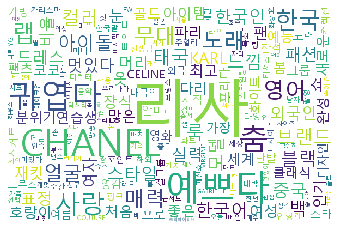

In [101]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('wc_CH7L_top500.png')

In [45]:
CH9L.to_csv('./magazine/final/CH9L_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)

In [73]:
CH8L.to_csv('./magazine/final/CH8L_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)

In [103]:
CH7L.to_csv('./magazine/final/CH7L_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)